> - Predicting car by using ResNet50

In [34]:
import tensorflow as tf

In [5]:
# Different layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
# ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
#Helps to make more image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
#Sequential Model
from tensorflow.keras.models import Sequential
import numpy as np
# glob module finds all the pathnames matching a specified pattern
from glob import glob
import matplotlib.pyplot as plt

In [6]:
#Keeping fixed image size as they can differ
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Datasets/Train'
valid_path = '/content/drive/My Drive/Datasets/Test'

> - Adding [3] to image as RGB channel
> - By default(1000 Layer) ResNet50 uses idea of imagenet so we are dropping first and last of model.  

In [8]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [9]:
for layer in resnet.layers:
    layer.trainable = False

In [12]:
folders = glob('/content/drive/My Drive/Datasets/Train/*')

In [13]:
folders

['/content/drive/My Drive/Datasets/Train/lamborghini',
 '/content/drive/My Drive/Datasets/Train/mercedes',
 '/content/drive/My Drive/Datasets/Train/audi']

> - Flatten model before passing to dence layer

In [14]:
x = Flatten()(resnet.output)

> - Making Dense layer and adding to Model

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object and input and output to it
model = Model(inputs=resnet.input, outputs=prediction)

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844

> -  Rescaling value to 0-1
> - Never ever in your life use shear_range, zoom_range, horizontal_flip on test data
> - A random zoom is obtained by the zoom_range argument
> -  This creates a sort of ‘stretch’ in the image, which is not seen in rotation. shear_range specifies the angle of the slant in degrees.


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

/bin/bash: -c: line 0: syntax error near unexpected token `https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844'
/bin/bash: -c: line 0: `[TowardsDataScience](https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844)'


In [19]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
# When one has 2 as outPut use Binary else Categorical works fine

Found 64 images belonging to 3 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [21]:
r = model.fit_generator(
  training_set,
  validation_data = test_set,
  epochs=50,
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
4/4 [==============================] - 66s 16s/step - loss: 9.1499 - accuracy: 0.2344 - val_loss: 6.3125 - val_accuracy: 0.3276
Epoch 2/50
4/4 [==============================] - 1s 258ms/step - loss: 6.0308 - accuracy: 0.4062 - val_loss: 6.7880 - val_accuracy: 0.1552
Epoch 3/50
4/4 [==============================] - 1s 254ms/step - loss: 4.1396 - accuracy: 0.4375 - val_loss: 1.2133 - val_accuracy: 0.6034
Epoch 4/50
4/4 [==============================] - 1s 254ms/step - loss: 1.8966 - accuracy: 0.4375 - val_loss: 2.4447 - val_accuracy: 0.1552
Epoch 5/50
4/4 [==============================] - 1s 255ms/step - loss: 1.5170 - accuracy: 0.4062 - val_loss: 1.0809 - val_accuracy: 0.5690
Epoch 6/50
4/4 [==============================] - 1s 253ms/step - loss: 1.0217 - accuracy: 0.5469 - val_loss: 1.3401 - val_accuracy: 0.4483
Epoch 7/50
4/4 [==============================] - 1s 254ms/step - loss: 1.0053 - accu

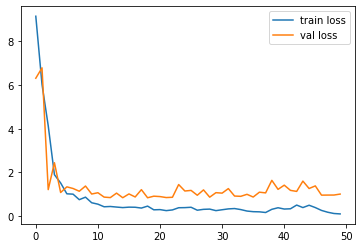

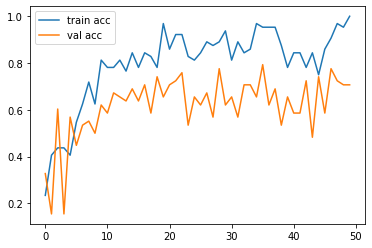

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# Saving Model
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

> - Predicting outPut on test data

In [24]:
y_pred = model.predict(test_set)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [26]:
img=image.load_img('/content/drive/My Drive/Datasets/Test/audi/23.jpg',target_size=(224,224)) 

In [27]:
x=image.img_to_array(img)

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[0.11088022, 0.770693  , 0.11842672]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
a

array([1])